In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

sns.set_theme(style="whitegrid", context="talk")

In [53]:
CURRENT_DIR = Path.cwd()  # Current directory of the running file
PARENT_DIR = CURRENT_DIR.parent  # Parent directory of the current directory
print(f"Current Directory: {CURRENT_DIR}")
print(f"Parent Directory: {PARENT_DIR}")

Current Directory: c:\Users\admin\Coding\research\weld-ml\run1\P06_ML_Plot
Parent Directory: c:\Users\admin\Coding\research\weld-ml\run1


In [54]:
# Reading data from ML runs
datas_ML = [
    {
        "name": "no_af",
        "path": PARENT_DIR
        / "P01_no_af"
        / "T01_optuna"
        / "S03_calculate_performances.xlsx",
    },
    {
        "name": "MF_1",
        "path": PARENT_DIR
        / "P02_MF_1"
        / "T02_optuna"
        / "S03_calculate_performances.xlsx",
    },
    {
        "name": "MF_2",
        "path": PARENT_DIR
        / "P03_MF_2"
        / "T02_optuna"
        / "S03_calculate_performances.xlsx",
    },
    {
        "name": "VF_2_VIF",
        "path": PARENT_DIR
        / "P04_MF2"
        / "T02_optuna"
        / "S03_calculate_performances.xlsx",
    },
]

df_arr = []
for data in datas_ML:
    _df = pd.read_excel(data["path"])
    _df["run_name"] = data["name"]  # Add a column for the name of the dataset
    df_arr.append(_df)
    print(f"Data for {data['name']}:")
    # display(df.head())

df_ml = pd.concat(df_arr, ignore_index=True)
display(df_ml.head())


Data for no_af:
Data for MF_1:
Data for MF_2:
Data for VF_2_VIF:


,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test,run_name
0,1,0.3,DTR,Y-1,0.866326,1.271951,1.636570,1.910079,0.133674,0.004997,no_af
1,1,0.3,DTR,Y-2,0.956704,0.864417,1.138763,1.526384,0.043296,-0.054135,no_af
2,1,0.3,DTR,Y-3,0.638276,0.591048,1.411317,1.476863,0.361724,0.307089,no_af
3,1,0.3,DTR,Y-All,0.820435,0.909139,1.395550,1.637775,0.179565,0.085983,no_af
4,2,0.3,DTR,Y-1,0.954431,0.897289,1.359437,1.124797,0.045569,-0.028396,no_af


In [55]:
df_ml.columns

Index(['random_state', 'test_size', 'model', 'Y', 'MSE Train (No Val)',
       'MSE Test', 'MAPE Train (No Val)', 'MAPE Test', 'R2 Train (No Val)',
       'R2 Test', 'run_name'],
      dtype='object')

In [56]:
# Reading data from tabPFN runs
datas_trans = [
    {
        "name": "no_af",
        "path": PARENT_DIR
        / "P01_no_af"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
    {
        "name": "MF_1",
        "path": PARENT_DIR
        / "P02_MF_1"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
    {
        "name": "MF_2",
        "path": PARENT_DIR
        / "P03_MF_2"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
    {
        "name": "VF_2_VIF",
        "path": PARENT_DIR
        / "P04_MF2"
        / "T11_tabPFN"
        / "S01_calculate_performance.xlsx",
    },
]

df_arr = []
for data in datas_trans:
    _df = pd.read_excel(data["path"])
    _df["run_name"] = data["name"]  # Add a column for the name of the dataset
    df_arr.append(_df)
    print(f"Data for {data['name']}:")
    # display(df.head())

df_trans = pd.concat(df_arr, ignore_index=True)
df_trans = df_trans.rename(
    columns={"MSE": "MSE Test", "MAPE": "MAPE Test", "R2": "R2 Test"}
)
display(df_trans.head())

Data for no_af:
Data for MF_1:
Data for MF_2:
Data for VF_2_VIF:


,random_state,test_size,model,Y,MSE Test,MAPE Test,R2 Test,run_name
0,1,0.3,TabPFN,Y-1,1.277798,1.604244,0.000423,no_af
1,1,0.3,TabPFN,Y-2,0.831836,1.053364,-0.014403,no_af
2,1,0.3,TabPFN,Y-3,0.550377,1.203430,0.354769,no_af
3,1,0.3,TabPFN,Y-All,0.886670,1.287012,0.113596,no_af
4,2,0.3,TabPFN,Y-1,0.893694,1.123660,-0.024277,no_af


In [57]:
df = pd.concat([df_ml, df_trans], ignore_index=True)
display(df)

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test,run_name
0,1,0.3,DTR,Y-1,0.866326,1.271951,1.636570,1.910079,0.133674,0.004997,no_af
1,1,0.3,DTR,Y-2,0.956704,0.864417,1.138763,1.526384,0.043296,-0.054135,no_af
2,1,0.3,DTR,Y-3,0.638276,0.591048,1.411317,1.476863,0.361724,0.307089,no_af
3,1,0.3,DTR,Y-All,0.820435,0.909139,1.395550,1.637775,0.179565,0.085983,no_af
4,2,0.3,DTR,Y-1,0.954431,0.897289,1.359437,1.124797,0.045569,-0.028396,no_af
...,...,...,...,...,...,...,...,...,...,...,...
635,4,0.3,TabPFN,Y-All,NaN,0.736198,NaN,1.576269,NaN,0.255948,VF_2_VIF
636,5,0.3,TabPFN,Y-1,NaN,0.943171,NaN,1.409703,NaN,0.191243,VF_2_VIF
637,5,0.3,TabPFN,Y-2,NaN,0.792151,NaN,1.194374,NaN,-0.034656,VF_2_VIF
638,5,0.3,TabPFN,Y-3,NaN,0.493716,NaN,1.232303,NaN,0.480550,VF_2_VIF


In [58]:
df["run_name"].unique()

array(['no_af', 'MF_1', 'MF_2', 'VF_2_VIF'], dtype=object)

In [59]:
df["model"].unique()

array(['DTR', 'EN', 'GBR', 'KNR', 'RFR', 'SVR', 'XGBR', 'TabPFN'],
      dtype=object)

In [60]:
filt1 = df["Y"] != "Y-All"
filt2 = df["run_name"] == "VF_2_VIF"
filt3 = df["Y"] == "Y-3"
df_filt = df[filt1 & filt2 & filt3]
df_filt

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test,run_name
422,1,0.3,DTR,Y-3,6.639023e-01,0.595727,1.437843e+00,1.444925,0.336098,0.301604,VF_2_VIF
426,2,0.3,DTR,Y-3,5.762370e-01,0.707766,2.053174e+00,1.681362,0.423763,0.358830,VF_2_VIF
430,3,0.3,DTR,Y-3,6.630723e-01,0.498875,1.497295e+00,1.466551,0.336928,0.320652,VF_2_VIF
434,4,0.3,DTR,Y-3,6.311031e-01,0.628256,1.509912e+00,1.384842,0.368897,0.255950,VF_2_VIF
438,5,0.3,DTR,Y-3,5.883786e-01,0.611216,1.552361e+00,1.401612,0.411621,0.356927,VF_2_VIF
442,1,0.3,EN,Y-3,6.734662e-01,0.611978,1.290882e+00,1.299453,0.326534,0.282552,VF_2_VIF
446,2,0.3,EN,Y-3,6.861107e-01,0.831790,1.681909e+00,1.123199,0.313889,0.246475,VF_2_VIF
450,3,0.3,EN,Y-3,7.164191e-01,0.470034,1.340606e+00,1.106732,0.283581,0.359926,VF_2_VIF
454,4,0.3,EN,Y-3,5.919129e-01,0.702683,1.425042e+00,1.275879,0.408087,0.167804,VF_2_VIF
458,5,0.3,EN,Y-3,5.919080e-01,0.704999,1.447164e+00,1.274632,0.408092,0.258256,VF_2_VIF


Order of models based on mean R2 Test: Index(['TabPFN', 'RFR', 'GBR', 'XGBR', 'DTR', 'EN', 'SVR', 'KNR'], dtype='object', name='model')


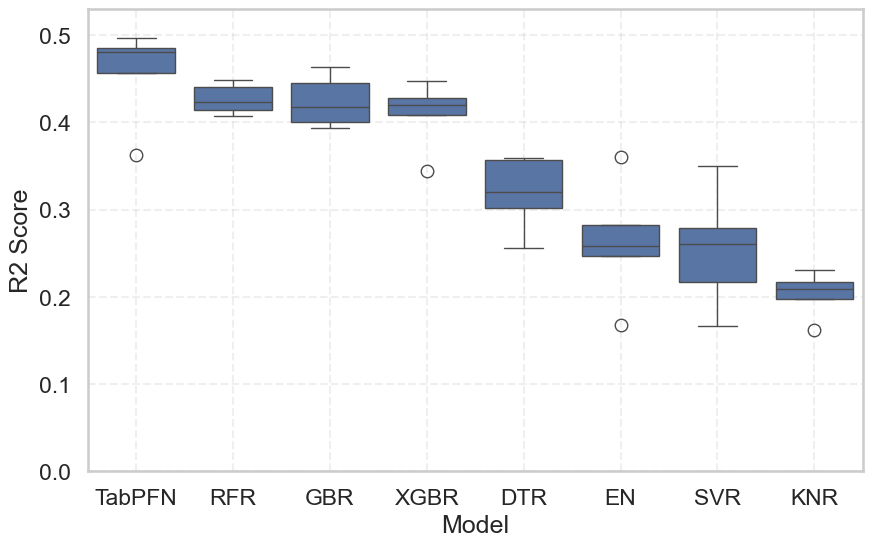

In [61]:
filt1 = df["Y"] != "Y-All"
filt2 = df["run_name"] == "VF_2_VIF"
filt3 = df["Y"] == "Y-3"
df_filt = df[filt1 & filt2 & filt3]


mean_order = (
    df_filt.groupby("model")["R2 Test"].mean().sort_values(ascending=False).index
)
print("Order of models based on mean R2 Test:", mean_order)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df_filt, x="model", y="R2 Test", ax=ax, order=mean_order)
plt.grid(True, which="major", linestyle="--", alpha=0.3)
ax.set_ylim(0.0, 0.53)
ax.set_xlabel("Model")
ax.set_ylabel("R2 Score")
plt.savefig("compare_different_models.png", dpi=300, bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_18704\3921639316.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["Y"] = df_filt["Y"].map(section_map)


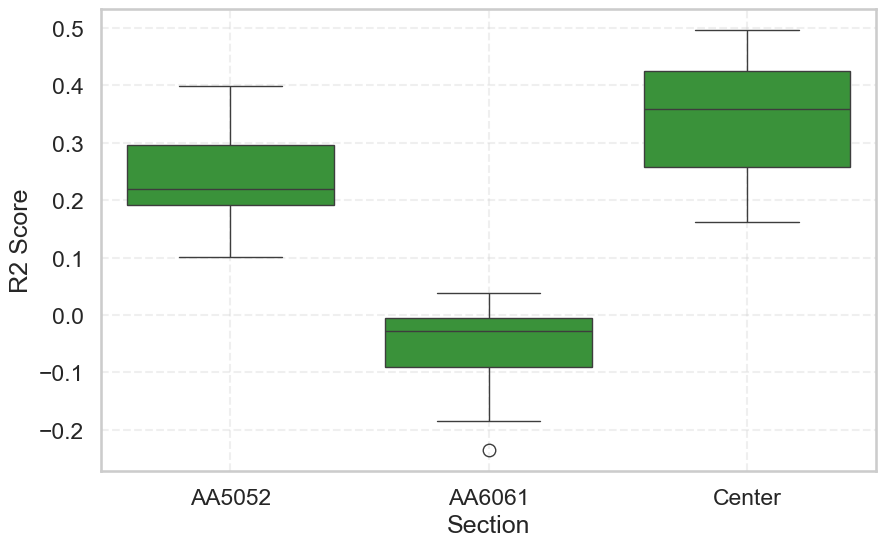

In [62]:
filt1 = df["Y"] != "Y-All"
filt2 = df["run_name"] == "VF_2_VIF"
filt3 = df[
    "Y"
].any()  # This will be True if there is any non-empty value in the "Y" column
# filt3 = df["model"].isin(["TabPFN", "XGBoost", "RFR"])
df_filt = df[filt1 & filt2 & filt3]


section_map = {
    "Y-1": "AA5052",
    "Y-2": "AA6061",
    "Y-3": "Center",
}

df_filt["Y"] = df_filt["Y"].map(section_map)


# mean_order = df_filt.groupby("model")["R2 Test"].mean().sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df_filt, x="Y", y="R2 Test", ax=ax, color="tab:green")
plt.grid(True, which="major", linestyle="--", alpha=0.3)
# ax.set_ylim(0.0, 0.53)
ax.set_xlabel("Section")
ax.set_ylabel("R2 Score")
plt.savefig("compare_different_sections.png", dpi=300, bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_18704\2661357260.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["run_name"] = df_filt["run_name"].map(run_name_map)


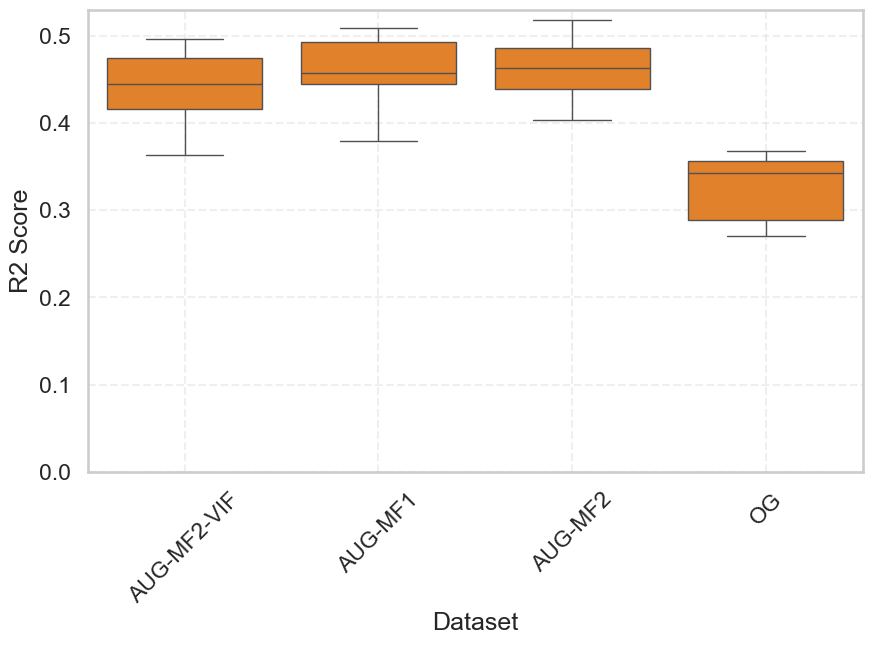

In [63]:
filt1 = df["Y"] != "Y-All"
filt2 = df["Y"] == "Y-3"
filt3 = df["model"].isin(["TabPFN", "XGBoost", "RFR"])
df_filt = df[filt1 & filt2 & filt3]

# Change Label
run_name_map = {
    "no_af": "OG",
    "MF_1": "AUG-MF1",
    "MF_2": "AUG-MF2",
    "VF_2_VIF": "AUG-MF2-VIF",
}
df_filt["run_name"] = df_filt["run_name"].map(run_name_map)


# run_name_order = (
#     df_filt.groupby("run_name")["R2 Test"].mean().sort_values(ascending=False).index
# )
run_name_order = [
    "AUG-MF2-VIF",
    "AUG-MF1",
    "AUG-MF2",
    "OG",
]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df_filt, x="run_name", y="R2 Test", ax=ax, order=run_name_order, color="tab:orange")
plt.grid(True, which="major", linestyle="--", alpha=0.3)
# Axis rotation
ax.tick_params(axis="x", rotation=45)
ax.set_ylim(0.0, 0.53)
ax.set_xlabel("Dataset")
ax.set_ylabel("R2 Score")
plt.savefig("compare_different_features.png", dpi=300, bbox_inches="tight")